<a href="https://colab.research.google.com/github/jiobu1/DS-Unit-1-Sprint-4-Data-Storytelling-Portfolio-Project/blob/master/Jisha_Obukwelu_Unit_1_Data_Storytelling_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ATLANTA ARRESTS RECORDS FOR THE PAST DECADE
#2009-2019

####Loading libraries 

In [0]:
#Import different libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import seaborn as sns

from scipy import stats 
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.stats import chisquare
from scipy.stats import normaltest
from scipy.stats import ks_2samp

####Loading Directories

In [0]:
# #Loading files
# from google.colab import files
# upload = files.upload()

Saving COBRA-2009-2019.csv to COBRA-2009-2019.csv


Initially, I was working with this file locally. I was able to use command line to push the file to github (after installing their large file package - git lfs).

In [0]:
url = "https://raw.githubusercontent.com/jiobu1/DS-Unit-1-Sprint-4-Data-Storytelling-Portfolio-Project/master/COBRA-2009-2019.csv"

In [8]:
arrests = pd.read_csv(url)
                    
#did not pass through dtype becasue this deleted a lot of the information

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


####Exploring Data

In [9]:
arrests.shape

(342914, 19)

In [10]:
arrests.head()

,Report Number,Report Date,Occur Date,Occur Time,Possible Date,Possible Time,Beat,Apartment Office Prefix,Apartment Number,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,90010930,2009-01-01,2009-01-01,1145,2009-01-01,1148.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,90011083,2009-01-01,2009-01-01,1330,2009-01-01,1330.0,511.0,NaN,NaN,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,90011208,2009-01-01,2009-01-01,1500,2009-01-01,1520.0,407.0,NaN,NaN,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,90011218,2009-01-01,2009-01-01,1450,2009-01-01,1510.0,210.0,NaN,NaN,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,90011289,2009-01-01,2009-01-01,1600,2009-01-01,1700.0,411.0,NaN,NaN,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


## Data Cleaning

In [11]:
arrests[['UCR #', 'IBR Code']].nunique()

UCR #       52
IBR Code    91
dtype: int64

In [12]:
#Choosing columns
arrests = arrests[['Report Date', 'Occur Date', 'Occur Time',
                   'Beat', 'Location', 'Shift Occurence', 'Location Type', 
                   'UCR Literal', 'UCR #', 'IBR Code', 'Neighborhood', 'NPU', 
                   'Latitude','Longitude']]
arrests.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude
0,2009-01-01,2009-01-01,1145,411.0,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328
1,2009-01-01,2009-01-01,1330,511.0,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201
2,2009-01-01,2009-01-01,1500,407.0,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282
3,2009-01-01,2009-01-01,1450,210.0,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212
4,2009-01-01,2009-01-01,1600,411.0,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773


In [13]:
arrests.shape

(342914, 14)

####Still cleaning data
Analyzing how many null values are in the dataframe 

In [14]:
arrests.isnull().sum()
#Not sure if I want to delete null functions just yet

Report Date            0
Occur Date             0
Occur Time             0
Beat                  24
Location               2
Shift Occurence        0
Location Type       9216
UCR Literal            0
UCR #                  0
IBR Code             170
Neighborhood       12363
NPU                  139
Latitude               0
Longitude              0
dtype: int64

##Exploration


###- Has crime gone down?



1.   Crime increase/decrease by years
2.   Specific crimes by year
3.   Crime by the time of year




In [0]:
#Parsing dates into years and months

##### Creating New Features

In [16]:
#Using occur date instead of report date or possible date
arrests['Occur Date'].head()

0    2009-01-01
1    2009-01-01
2    2009-01-01
3    2009-01-01
4    2009-01-01
Name: Occur Date, dtype: object

In [0]:
#arrests['Occur Date'] = pd.to_datetime(arrests['Occur Date'], infer_datetime_format=True) This create a SetCopyWarning
arrests['Occur Date'] = arrests['Occur Date'].apply(pd.to_datetime)

In [0]:
arrests['Occur_Year'] = arrests['Occur Date'].dt.year
arrests['Occur_Month'] = arrests['Occur Date'].dt.month

In [19]:
arrests.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month
0,2009-01-01,2009-01-01,1145,411.0,2841 GREENBRIAR PKWY,Day Watch,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68845,-84.49328,2009,1
1,2009-01-01,2009-01-01,1330,511.0,12 BROAD ST SW,Day Watch,9,LARCENY-NON VEHICLE,630,2303,Downtown,M,33.75320,-84.39201,2009,1
2,2009-01-01,2009-01-01,1500,407.0,3500 MARTIN L KING JR DR SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Adamsville,H,33.75735,-84.50282,2009,1
3,2009-01-01,2009-01-01,1450,210.0,3393 PEACHTREE RD NE,Evening Watch,8,LARCENY-NON VEHICLE,630,2303,Lenox,B,33.84676,-84.36212,2009,1
4,2009-01-01,2009-01-01,1600,411.0,2841 GREENBRIAR PKWY SW,Unknown,8,LARCENY-NON VEHICLE,630,2303,Greenbriar,R,33.68677,-84.49773,2009,1


####Crime increase/decrease by years

In [20]:
# Not including 2020 
year = arrests['Occur_Year'].value_counts()[:11].to_dict()
year

{2009: 39326,
 2010: 35529,
 2011: 34852,
 2012: 33382,
 2013: 32398,
 2014: 31115,
 2015: 30058,
 2016: 29006,
 2017: 26386,
 2018: 25611,
 2019: 24853}

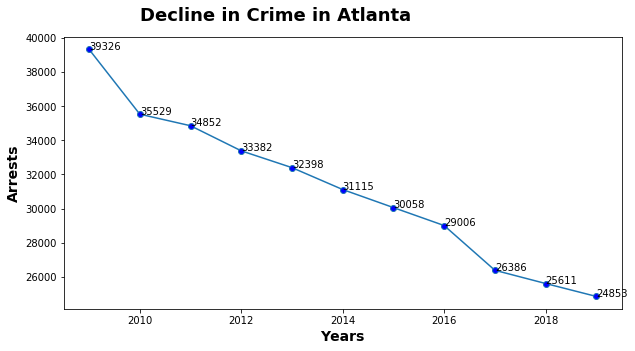

In [21]:
# sorted by key, return a list of tuples
lists = sorted(year.items()) 

# unpack a list of pairs into two tuples
x, y = zip(*lists) 

# fig size
fig, ax = plt.subplots(figsize = (10, 5))
fig.facecolor = 'white'

# graphing line
plt.plot(x, y, marker = 'o', markerfacecolor='blue')

# labeling graph
plt.text (x = 2010, 
          y = 41000, 
          s = 'Decline in Crime in Atlanta', 
          fontsize = 18, 
          fontweight = 'bold')

plt.xlabel('Years', fontsize = 14, fontweight = 'bold')
plt.ylabel('Arrests', fontsize = 14, fontweight = 'bold')

# labeling data
for i, txt in enumerate(y):
    plt.annotate(txt, (x[i], y[i]))

plt.show()

From this graph we can see that overall crime has been down but does this reflect across the board for crimes, or are some crimes becoming more or less prevalent?

###- Have specific crimes gone down?

#### Has all crime been declining?

In [22]:
arrests['UCR Literal'].value_counts()

LARCENY-FROM VEHICLE    105630
LARCENY-NON VEHICLE      81942
BURGLARY-RESIDENCE       49577
AUTO THEFT               47067
AGG ASSAULT              25049
ROBBERY-PEDESTRIAN       17167
BURGLARY-NONRES          10950
ROBBERY-COMMERCIAL        2317
ROBBERY-RESIDENCE         2230
HOMICIDE                   982
MANSLAUGHTER                 3
Name: UCR Literal, dtype: int64

In [23]:
#Calculating  specific crimes by years
crime_year = pd.crosstab(arrests['Occur_Year'], arrests['UCR Literal'])

crime_year  = crime_year.drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                 1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])

crime_year

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,MANSLAUGHTER,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Occur_Year,,,,,,,,,,,
2009,2613,5625,1682,7393,77,10966,8295,0,296,2070,309
2010,2612,4996,1272,6713,89,9176,8510,0,218,1709,234
2011,2536,5205,996,6408,84,8589,8723,0,217,1826,268
2012,2521,5098,825,5326,83,8825,8438,0,179,1842,245
2013,2275,4483,971,4976,81,9343,7905,0,284,1882,198
2014,2238,4142,1030,4436,87,9459,7353,0,221,1938,211
2015,2156,4236,863,3921,87,9593,7044,0,235,1737,186
2016,2193,3849,976,3400,114,9995,6564,0,201,1508,206
2017,2036,3195,765,2629,86,9826,6433,0,157,1127,132


<function matplotlib.pyplot.show>

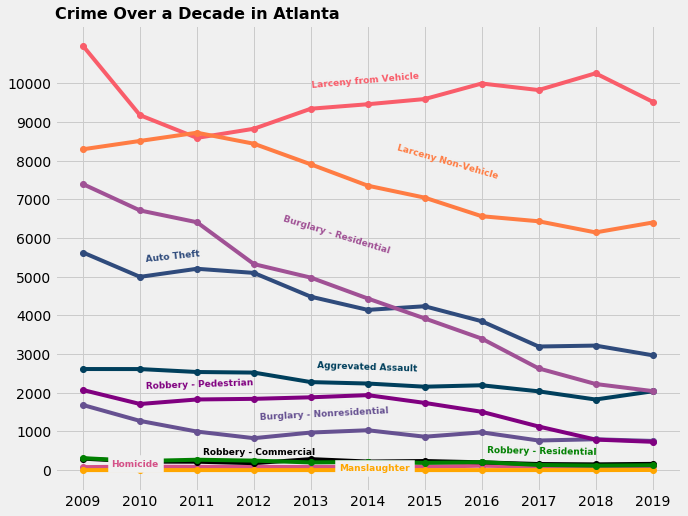

In [24]:
# Playing with loop to generate both lines and labels
plt.style.use('fivethirtyeight')
plt.figure(figsize = (10, 8))
plt.backgroundcolor = '#f0f0f0'

# Creating line plots
plot_points = []

crimes = crime_year.columns

colors_array = ['#003f5c','#2f4b7c','#665191','#a05195',
          '#d45087','#f95d6a','#ff7c43','#ffa600', 
          'black', 'purple', 'green']

for crime, color in zip(crimes, colors_array):

    points = plt.plot(crime_year[crime], marker='o', color = color)
    plot_points.append(points)

plot_points;

# Title, Axes
plt.title ("Crime Over a Decade in Atlanta",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 11000, 1000))

#Sometimes shows up and somethimes does not. 
plt.xlabel = ('Years')
plt.ylabel = ('Arrests')

#Labeling Lines
text = []

x_coordinates = [2013.1, 2010.1, 2012.1, 2012.5, 2009.5, 2013, 2014.5, 2013.5, 2011.1, 2010.1, 2016.1]
y_coordinates = [2550, 5400, 1300, 5600, 100, 9900, 7550, -10, 400, 2100, 400]
labels = ['Aggrevated Assault', 'Auto Theft', 'Burglary - Nonresidential', 
          'Burglary - Residential', '', 'Larceny from Vehicle', 'Larceny Non-Vehicle', 
          '', 'Robbery - Commercial', 'Robbery - Pedestrian', 'Robbery - Residential']
rotations = [-2, 6, 3, -17, 0, 5, -16, 0, 0, 2, -1]


for x, y, label, color, rotation in zip(x_coordinates, y_coordinates, labels, colors_array, rotations):

  position = plt.text(x = x, y = y, s = label , color = color, fontsize = 9, weight = 'bold', rotation = rotation)
  text.append(position)

text;

#Two Other Labels
plt.text(x = 2009.5, y = 100, s = 'Homicide', color = colors_array[4], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0)
plt.text(x = 2013.5, y = -10, s = 'Manslaughter', color = colors_array[7], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0 )


plt.show

All crimes have been on a downward trajectory except for vehicle larceny, auto theft, and nonresidential burglary. We will look at these areas closer later. 

#### Finding out if time of year affects crime type

In [25]:
cut_points = [0, 3, 6, 9, 12]
label_names = ['0-3','4-6','7-9','10-12']
arrests['months_categories'] = pd.cut(arrests['Occur_Month'], cut_points, labels=label_names)
arrests['months_categories'].value_counts()

7-9      91848
10-12    88461
4-6      87759
0-3      74846
Name: months_categories, dtype: int64

In [26]:
specific_months = pd.crosstab(arrests['Occur_Year'], arrests['months_categories']).drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                                    1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])
specific_months = specific_months.T
specific_months

Occur_Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
months_categories,,,,,,,,,,,
0-3,9097,7377,7195,7281,7451,6617,6662,6459,5570,5812,5267
4-6,10180,9269,9253,8658,8475,7723,7711,7235,6477,6419,6323
7-9,10146,9518,9599,8986,8722,8275,8187,7922,7079,6622,6744
10-12,9903,9365,8805,8457,7750,8500,7498,7390,7260,6758,6519


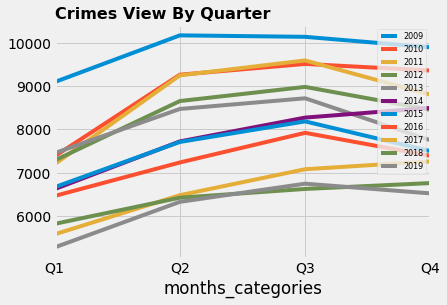

In [32]:

plt.style.use('fivethirtyeight')
figsize = (15, 10)
plt.backgroundcolor = '#f0f0f0'

specific_months.plot()

# Title, Axes
plt.title ("Crimes View By Quarter",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left')

# plt.xlabel('Quarter', fontsize = 14, fontweight = 'bold')
# plt.ylabel('Arrests', fontsize = 14, fontweight = 'bold')

plt.xticks(np.arange(4), ('Q1', 'Q2', 'Q3', 'Q4'))
      

plt.legend(fontsize = 8, 
           loc = 'upper right')

plt.show()

In this chart you can see that there is a rise in crime during the warmer months. 2014 and 2017 are the only ones that are an exception to this rule, both of these years crime increased in the later part of the year.

###Neighorhood

####Crime by neighborhoods

In [0]:
# Too many neighborhoods to evaluate
# Will look at top 10

In [0]:
arrests['Neighborhood'].value_counts()[:10]

Downtown           25386
Midtown            18240
Old Fourth Ward     9945
West End            8506
Lenox               6203
North Buckhead      5651
Vine City           5506
Greenbriar          5486
Sylvan Hills        5451
Grant Park          5293
Name: Neighborhood, dtype: int64

In [0]:
areas = arrests['Neighborhood'].unique()
list_to_remove = ['Downtown','Midtown','Old Fourth Ward','West End','Lenox',
                  'North Buckhead ', 'Greenbriar','Vine City', 'Sylvan Hills',
                  'Grant Park']

final_list= list(set(areas).difference(set(list_to_remove)))
final_list.pop(0)
final_list.remove('North Buckhead')
final_list;

In [0]:
#Checking that the top 10 neighborhoods are not in the final list to be deleted.
'Vine City' in final_list

False

In [0]:
neighborhood = pd.crosstab(arrests['Neighborhood'], arrests['Occur_Year'])
neighborhood = neighborhood.drop(final_list);

In [0]:
neighborhood = neighborhood.T.drop([1916, 1920, 1970, 1973, 1976,	1979, 1980,	1991, 
                                    1993, 2000,	2001,	2003,	2004,	2005,	2006, 2007,	2008])
neighborhood

Neighborhood,Downtown,Grant Park,Greenbriar,Lenox,Midtown,North Buckhead,Old Fourth Ward,Sylvan Hills,Vine City,West End
Occur_Year,,,,,,,,,,
2009,3156,570,651,794,2224,582,1195,574,524,859
2010,2579,602,564,645,1760,592,1032,576,423,1030
2011,2660,563,543,569,1705,433,1199,628,376,956
2012,2203,516,556,546,1589,543,1080,558,449,838
2013,2344,540,576,550,1801,540,947,523,534,906
2014,2389,526,522,522,1715,493,879,498,638,814
2015,2262,424,416,624,1521,427,815,520,658,800
2016,1824,441,522,518,1309,544,784,501,595,681
2017,1814,352,427,520,1402,477,694,375,360,574


According to this chart you can see that 3 out of these top 10 neighborhoods have seen a surge in crime in 2019 -  Grant Park, Midtown and Old Fourth Ward. 

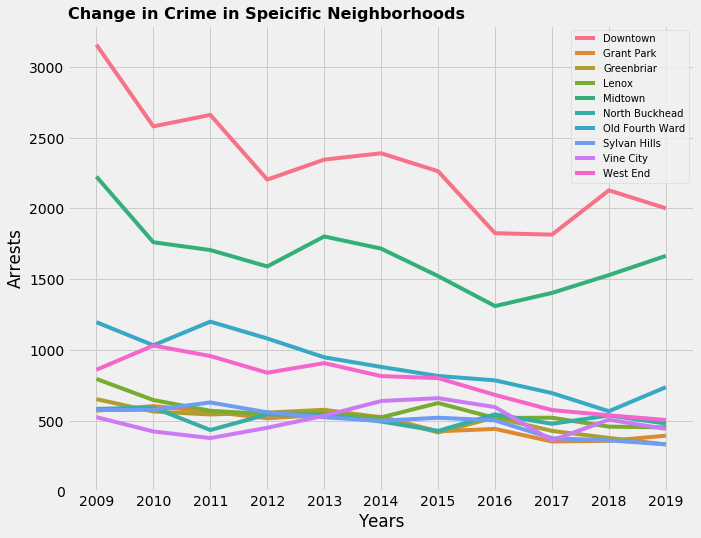

In [0]:
#Plot figure
plt.figure(figsize = (10, 8))
ax = sns.lineplot(data = neighborhood, hue = 'Neighborhood', dashes= False, legend='brief')
plt.legend(fontsize = 10,  loc = 'best')

# Title, Axes
plt.title ("Change in Crime in Speicific Neighborhoods",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 3500, 500))

#Sometimes shows up and somethimes does not. 
ax.set(xlabel='Years', ylabel='Arrests')

plt.show()

####Further Analysis of Crime 
Looking specifically at neighborhoods where crime has risen in the last year. 

In [41]:
condition = (arrests['Neighborhood']=='Grant Park')|(arrests['Neighborhood']=='Midtown') | (arrests['Neighborhood']=='Old Fourth Ward')
rise = arrests[condition]
rise.head()

,Report Date,Occur Date,Occur Time,Beat,Location,Shift Occurence,Location Type,UCR Literal,UCR #,IBR Code,Neighborhood,NPU,Latitude,Longitude,Occur_Year,Occur_Month,months_categories
15,2009-01-01,2009-01-01,900,604.0,626 DEKALB AVE SE,Day Watch,18,LARCENY-FROM VEHICLE,640,2305,Old Fourth Ward,M,33.75283,-84.36687,2009,1,0-3
16,2009-01-01,2008-12-31,1915,503.0,422 9TH ST NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78080,-84.37334,2008,12,10-12
18,2009-01-01,2008-12-31,1700,502.0,188 14TH STREET,Day Watch,18,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.78663,-84.38139,2008,12,10-12
19,2009-01-01,2008-12-29,1700,614.0,897 MONROE CIR NE,Day Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77917,-84.36851,2008,12,10-12
25,2009-01-01,2009-01-01,1200,505.0,6TH ST NE / W PEACHTREE ST NE,Evening Watch,13,LARCENY-FROM VEHICLE,640,2305,Midtown,E,33.77754,-84.38730,2009,1,0-3


In [0]:
occur_

In [47]:
#Calculating  specific crimes by years
rise_crime = pd.crosstab(rise['Occur_Year'], rise['UCR Literal'])

rise_crime  = rise_crime.drop([1916, 1976, 1993, 2004, 2007, 2008])

rise_crime

UCR Literal,AGG ASSAULT,AUTO THEFT,BURGLARY-NONRES,BURGLARY-RESIDENCE,HOMICIDE,LARCENY-FROM VEHICLE,LARCENY-NON VEHICLE,ROBBERY-COMMERCIAL,ROBBERY-PEDESTRIAN,ROBBERY-RESIDENCE
Occur_Year,,,,,,,,,,
2009,163,527,146,319,4,1844,764,29,179,14
2010,157,409,117,302,6,1445,750,18,173,17
2011,170,440,60,269,6,1415,888,17,174,28
2012,136,392,86,213,6,1313,832,12,175,20
2013,137,369,72,195,6,1536,773,32,157,11
2014,107,356,95,196,2,1499,673,18,158,16
2015,124,341,60,211,2,1257,598,23,135,9
2016,112,231,96,169,5,1150,637,13,113,8
2017,102,236,63,96,2,1136,700,8,96,9


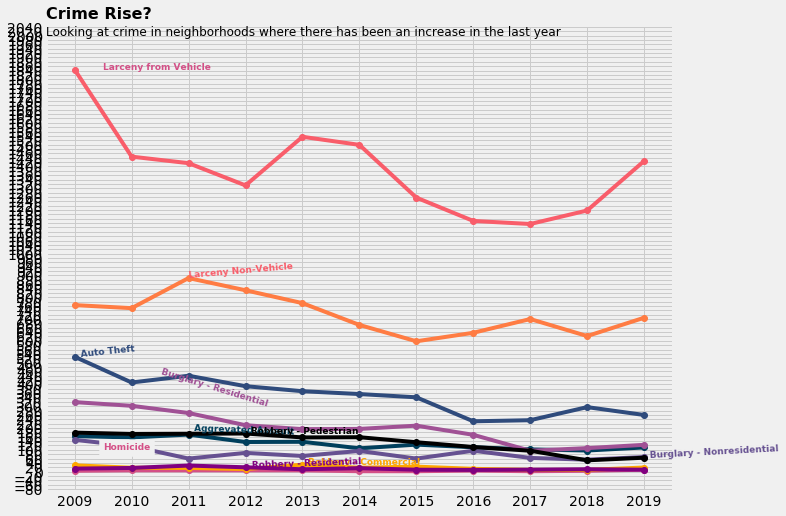

In [72]:
# Playing with loop to generate both lines and labels
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (10, 8))
plt.backgroundcolor = '#f0f0f0'

# Creating line plots
plot_points = []

crimes = rise_crime.columns

colors_array = ['#003f5c','#2f4b7c','#665191','#a05195',
          '#d45087','#f95d6a','#ff7c43','#ffa600', 
          'black', 'purple', 'green']

for crime, color in zip(crimes, colors_array):

    points = plt.plot(rise_crime[crime], marker='o', color = color)
    plot_points.append(points)

plot_points;

# Title, Axes
plt.title ("Crime Rise?",
          fontsize = 16,
          fontweight = 'bold', 
          loc = 'left');

plt.text (x = 2008.5, y = 2000,  s = 'Looking at crime in neighborhoods where there has been an increase in the last year', 
          color = 'black', fontsize = 12)


plt.xticks(range(2009, 2020, 1 ))
plt.yticks(range(0, 2100, 50))

# Make a plot with major ticks that are multiples of 100 and minor ticks that
# are multiples of 25.  Label major ticks with 'but don't label minor ticks.
ax.yaxis.set_major_locator(MultipleLocator(20))

# For the minor ticks, use no labels; default NullFormatter.
ax.yaxis.set_minor_locator(MultipleLocator(5))


#Sometimes shows up and somethimes does not. 
plt.xlabel = ('Years')
plt.ylabel = ('Arrests')

#Labeling Lines
text = []

x_coordinates = [2011.1, 2009.1, 2019.1, 2010.5, 2009.5, 2011, 2013.5,2013.1, 2012.1, 2012.1]
y_coordinates = [171, 527, 67, 303, 1845, 889, 33, 32, 175, 20]
labels = ['Aggrevated Assault', 'Auto Theft', 'Burglary - Nonresidential', 
          'Burglary - Residential', 'Larceny from Vehicle', 'Larceny Non-Vehicle', 
          '', 'Robbery - Commercial', 'Robbery - Pedestrian', 'Robbery - Residential']
rotations = [-2, 6, 3, -17, 0, 5, -16, 0, 0, 2, -1]


for x, y, label, color, rotation in zip(x_coordinates, y_coordinates, labels, colors_array, rotations):

  position = plt.text(x = x, y = y, s = label , color = color, fontsize = 9, weight = 'bold', rotation = rotation)
  text.append(position)

text;

#Two Other Labels
plt.text(x = 2009.5, y = 100, s = 'Homicide', color = colors_array[4], 
         fontsize = 9,  weight = 'bold', backgroundcolor = '#f0f0f0', rotation = 0)




plt.show ()